<a href="https://colab.research.google.com/github/mohaipro/deep_learning_pytorch/blob/main/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Import numerical operations library for efficient computations
import numpy as np

# Import pandas library for data manipulation and analysis
import pandas as pd

# Import matplotlib for data visualization (basic plotting)
import matplotlib.pyplot as plt

# Import seaborn for advanced and aesthetically pleasing statistical visualizations
import seaborn as sns

# Import scikit-learn's dataset utilities
from sklearn.datasets import load_breast_cancer

# Import train_test_split for splitting datasets into training and testing sets
from sklearn.model_selection import train_test_split

# Import tools for evaluating the performance of machine learning models
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
# Print the dimensions (shape) of the feature dataset 'X'
print("Feature dataset shape (X):", X.shape)

# Print the dimensions (shape) of the target dataset 'y'
print("Target dataset shape (y):", y.shape)

Feature dataset shape (X): (569, 30)
Target dataset shape (y): (569,)


In [34]:
# Check for missing (NaN) values in each column of the feature dataset 'X'
# and print the total count of missing values for each column
print("Missing values in each column of X:")
print(X.isna().sum())

Missing values in each column of X:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [35]:
# Print a concise summary of the DataFrame 'X'
# This includes information about data types, non-null values, and memory usage
print("Summary information about the DataFrame 'X':")
print(X.info())

Summary information about the DataFrame 'X':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-nu

In [36]:
# Import the PyTorch library for deep learning tasks
import torch

# Import the neural network (nn) module for defining and building models
import torch.nn as nn

# Import the optimization module for training models
import torch.optim as optim

# Import utilities for handling and loading datasets
from torch.utils.data import Dataset, DataLoader

# Convert the feature dataset 'X' into a PyTorch tensor with dtype float32
X = torch.tensor(X.values, dtype=torch.float32)

# Convert the target dataset 'y' into a PyTorch tensor with dtype float32
y = torch.tensor(y.values, dtype=torch.float32)

# Print the shape (dimensions) of the PyTorch tensor 'X'
print("Feature dataset shape (X):", X.shape)

# Print the shape (dimensions) of the PyTorch tensor 'y'
print("Target dataset shape (y):", y.shape)

Feature dataset shape (X): torch.Size([569, 30])
Target dataset shape (y): torch.Size([569])


In [37]:
# Import train_test_split function to split datasets into training and testing sets
from sklearn.model_selection import train_test_split

# Split the feature dataset 'X' and target dataset 'y' into training and testing sets
# test_size=0.2 indicates 20% of the data is used for testing
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes (dimensions) of the training and testing datasets for features (X) and targets (y)
print("Training feature dataset shape (X_train):", X_train.shape)
print("Testing feature dataset shape (X_test):", X_test.shape)
print("Training target dataset shape (y_train):", y_train.shape)
print("Testing target dataset shape (y_test):", y_test.shape)

Training feature dataset shape (X_train): torch.Size([455, 30])
Testing feature dataset shape (X_test): torch.Size([114, 30])
Training target dataset shape (y_train): torch.Size([455])
Testing target dataset shape (y_test): torch.Size([114])


In [38]:
# Define a custom PyTorch dataset class for breast cancer data
class BreastCancerDataset(Dataset):
    def __init__(self, X, y):
        # Store the feature data and target labels
        self.X = X
        self.y = y

    def __len__(self):
        # Return the total number of samples in the dataset
        return len(self.X)

    def __getitem__(self, idx):
        # Retrieve a single sample (features and label) by index
        return self.X[idx], self.y[idx]

# Create training and testing datasets using the custom dataset class
train_dataset = BreastCancerDataset(X_train, y_train)
test_dataset = BreastCancerDataset(X_test, y_test)

# Create data loaders for batching and shuffling the training data
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Create data loaders for the testing data without shuffling
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [39]:
# Iterate through the batches in the training data loader
for X_batch, y_batch in train_loader:
    # Print the shape (dimensions) of the feature batch
    print("Feature batch shape (X_batch):", X_batch.shape)

    # Print the shape (dimensions) of the target batch
    print("Target batch shape (y_batch):", y_batch.shape)

    # Break the loop after processing the first batch
    break

Feature batch shape (X_batch): torch.Size([32, 30])
Target batch shape (y_batch): torch.Size([32])


In [42]:
# Import accuracy_score for evaluating predictions
from sklearn.metrics import accuracy_score

# Define a custom neural network model for breast cancer prediction
class BreastCancerModel(nn.Module):
    def __init__(self, input_dim):
        super(BreastCancerModel, self).__init__()

        # Define the layers of the model
        self.fc1 = nn.Linear(input_dim, 64)  # First fully connected layer (input to hidden)
        self.fc2 = nn.Linear(64, 32)        # Second fully connected layer (hidden to hidden)
        self.fc3 = nn.Linear(32, 1)         # Third fully connected layer (hidden to output)

        # Define activation functions
        self.relu = nn.ReLU()               # ReLU activation for hidden layers
        self.sigmoid = nn.Sigmoid()         # Sigmoid activation for output layer

    def forward(self, x):
        # Forward propagation through the model
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)  # Sigmoid ensures output is between 0 and 1
        return x

    def predict(self, x, thresh=0.5):
        # Make predictions with a threshold applied
        self.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            output_probs = self.forward(x)  # Get probabilities
            output_labels = (output_probs >= thresh).int()  # Convert to binary labels
            return output_probs, output_labels

    def evaluate_accuracy(self, test_loader):
        # Evaluate the model's performance on the test dataset (accuracy)
        self.eval()  # Set the model to evaluation mode
        total = 0
        correct = 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                output_probs, output_labels = self.predict(X_batch, 0.5)  # Threshold is 0.5
                total += y_batch.size(0)  # Update total samples
                correct += (output_labels.squeeze() == y_batch).sum().item()  # Correct predictions
        return correct / total  # Return overall accuracy

    def evaluate_loss(self, criterion, test_loader):
        # Evaluate the model's performance on the test dataset (loss)
        self.eval()
        total_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                output_probs, _ = self.predict(X_batch, 0.5)
                loss = criterion(output_probs, y_batch.unsqueeze(1))  # Ensure y_batch is 2D
                total_loss += loss.item()
        return total_loss / len(test_loader)

# Instantiate the model with the input dimension equal to the number of features
model = BreastCancerModel(X.shape[1])

# Define binary cross entropy loss for classification
criterion = nn.BCELoss()

# Use the Adam optimizer for training the model
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set the number of epochs for training
num_epochs = 1000

# Start training the model
print("Starting training model!")
tot_acc = []  # List to store accuracy per epoch
tot_loss = []  # List to store loss per epoch
val_loss = []  # List to store validation loss
val_acc = []   # List to store validation accuracy

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    batch_num = 0
    epoch_loss = 0
    epoch_acc = 0

    # Mini batch gradient descent
    for X_batch, y_batch in train_loader:
        # Perform forward pass
        predictions = model(X_batch)

        # Convert predictions to binary labels using a threshold
        labels = (predictions >= 0.5).int()  # Apply the threshold

        # Calculate the loss
        loss = criterion(predictions, y_batch.unsqueeze(1))  # Ensure y_batch is 2D

        # Calculate accuracy for the current batch
        accuracy = accuracy_score(y_batch.detach().numpy(), labels.detach().numpy().squeeze())

        # Accumulate loss and accuracy
        epoch_loss += loss.item()
        epoch_acc += accuracy

        # Perform backward pass and optimization
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        batch_num += 1

    # Compute average loss and accuracy for the epoch
    epoch_loss /= batch_num
    epoch_acc /= batch_num

    # Store metrics for the epoch
    tot_loss.append(epoch_loss)
    tot_acc.append(epoch_acc)

    # Evaluate on the test set
    test_loss = model.evaluate_loss(criterion, test_loader)
    test_acc = model.evaluate_accuracy(test_loader)
    val_loss.append(test_loss)
    val_acc.append(test_acc)

    # Print metrics every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.4f}, Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_acc:.4f}")

print("Finished training model!")

Starting training model!
Epoch [100/1000], Training Loss: 0.1820, Training Accuracy: 0.9280, Testing Loss: 0.0955, Testing Accuracy: 0.9649
Epoch [200/1000], Training Loss: 0.1438, Training Accuracy: 0.9479, Testing Loss: 0.0987, Testing Accuracy: 0.9825
Epoch [300/1000], Training Loss: 0.1287, Training Accuracy: 0.9467, Testing Loss: 0.1313, Testing Accuracy: 0.9211
Epoch [400/1000], Training Loss: 0.0871, Training Accuracy: 0.9646, Testing Loss: 0.0815, Testing Accuracy: 0.9737
Epoch [500/1000], Training Loss: 0.0998, Training Accuracy: 0.9583, Testing Loss: 0.1022, Testing Accuracy: 0.9386
Epoch [600/1000], Training Loss: 0.1154, Training Accuracy: 0.9521, Testing Loss: 0.2302, Testing Accuracy: 0.9298
Epoch [700/1000], Training Loss: 0.2631, Training Accuracy: 0.9030, Testing Loss: 0.2150, Testing Accuracy: 0.9123
Epoch [800/1000], Training Loss: 0.0546, Training Accuracy: 0.9812, Testing Loss: 0.0580, Testing Accuracy: 0.9649
Epoch [900/1000], Training Loss: 0.0460, Training Accur

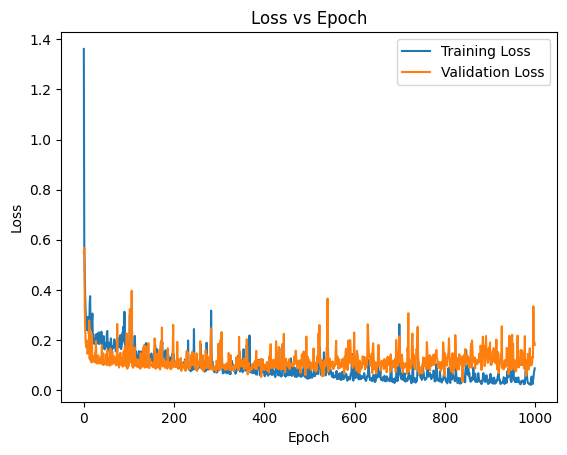

In [45]:
# Plot the training loss
plt.plot(tot_loss, label="Training Loss")

# Plot the validation loss
plt.plot(val_loss, label="Validation Loss")

# Add title to the plot
plt.title("Loss vs Epoch")

# Label the x-axis (Epochs)
plt.xlabel("Epoch")

# Label the y-axis (Loss)
plt.ylabel("Loss")

# Add legend to distinguish the lines
plt.legend()

# Display the plot
plt.show()

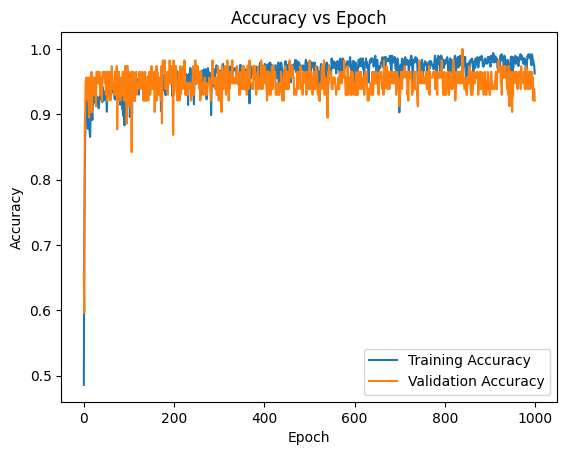

In [47]:
# Plot the training loss
plt.plot(tot_acc, label="Training Accuracy")

# Plot the validation loss
plt.plot(val_acc, label="Validation Accuracy")

# Add title to the plot
plt.title("Accuracy vs Epoch")

# Label the x-axis (Epochs)
plt.xlabel("Epoch")

# Label the y-axis (Loss)
plt.ylabel("Accuracy")

# Add legend to distinguish the lines
plt.legend()

# Display the plot
plt.show()

In [51]:
# Set the model to evaluation mode
model.eval()

# Initialize variables to track accuracy and loss
test_acc = 0
test_loss = 0

# Iterate through the test DataLoader
for X_batch, y_batch in test_loader:
    # Perform predictions with the model
    output_probs, output_labels = model.predict(X_batch, thresh=0.5)

    # Compute the loss for the current batch
    # Ensure y_batch is reshaped to match output_probs
    test_loss += criterion(output_probs, y_batch.unsqueeze(1)).item()

    # Calculate accuracy for the current batch
    test_acc += accuracy_score(y_batch.detach().numpy(), output_labels.detach().numpy())

# Compute average loss and accuracy across all batches
test_loss /= len(test_loader)
test_acc /= len(test_loader)

# Print the final test loss and accuracy
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.1807, Test Accuracy: 0.9297


In [53]:
# Save the trained model to a file
# This saves the entire model, including its architecture and parameters
torch.save(model, "breast_cancer_model.pth")

print("Model successfully saved as 'breast_cancer_model.pth'")

Model successfully saved as 'breast_cancer_model.pth'
